# Program to simulated the S-Parameters (S11 and S21)

Through this program it was possible to simulate the S-parameters (S11 and S21) through the properties of the material ($ \varepsilon $ and $ \mu $)

#### Steps:

1. Inpute valor for $\varepsilon$ e $\mu$
2. Use the NRW inverse to estimate the S-Parameters
3. Save the data calculated
4. Plote the experimental and theorical S-Parameters



In [1]:
from __future__ import division
import os
import numpy as np
import matplotlib.pyplot as plt

#-----------------Change Directory-------------------
local = os.getcwd()
os.chdir('./dados_exp')

In [2]:
#--------------Read the data-------------

TXT = []


n = 0

for arquivo in os.listdir('.'):
    if arquivo[len(arquivo)-4:] == '.txt':
        TXT.append(arquivo)

arq = open(TXT[n], 'r')
ler = arq.readlines()
arq.close()



# <font color = green>Plano de Referência</font>

* L1 = Referência da porta 1
* L = d = espessura da amostra
* L2 = Referência da porta 2
* offset ($\frac{\lambda}{4}$) = 9.76mm

#### Exemplo: Ao encostar 5mm na porta 1, sobrará 5mm em L2, porque o offset (1/4 lambda) tem quase 10mm.

In [3]:
# ------------------Parâmetros do Guia-------------

d = 5.10e-3 #[m] Espessura da amostra
L1 = 0.0e-3 #[m] Plano de referência porta 1
L2 = 9.76e-3 - d #[m] Plano de referência porta 2
a = 22.86e-3 #[m] Base maior do guia de onda (X-Band)

#Propriedades:
c = 2.998e8 #[m/s] Velocidade da luz
u0=4*np.pi*1e-7 # Permeabilidade do vácuo
freq_corte = 6.56e9 #[Hz] Frequência de Corte (X-Band)
onda_cut = c/freq_corte #[m] lambda de corte



# <font color = green>Frist kick</font>

Teflon: $\varepsilon = 2.04 + j0$ ....... $\mu = 1.0 + j0$


In [4]:

#Analytical Material Property
e_a = 2.04 - 0.0j #Permissividade ------> TEFLON
u_a = 1.0 - 0.0j #Permeabilidade ------> TEFLON

In [5]:
# -------------------VETORES--------------------

F=[] #frequência DE CALCULO [Hz] 
F_grafic=[] #FREQUENCIA PARA PLOTAR - CONVERTER [GHz]

s11r=[] #real
s11i=[] #imag
s21r=[] #real
s21i=[] #imag

s11=[] # real - j imag
s21=[] # real - j imag

s11c=[] # real - j imag (Adaptado)
s21c=[] # real - j imag (Adaptado)

R_Zin =[]


# Calculation Routine:



* <strong>Comprimento de onda no Vácuo</strong>

<font size = 6>$\lambda = \frac{c}{f}$</font>

<br/>
<br/>
<br/>

* <strong>Constante de Propagação no Vácuo</strong>

<font size = 6>$\gamma_{o}  = 2j\pi \sqrt{\frac{1}{\lambda^{2}}- \frac{1}{\lambda^{2}_{c}}}$</font>

<br/>
<br/>
<br/>

* <strong>Constante de Propagação no Material</strong>

<font size = 6>
$\gamma  = \frac{2j\pi}{\lambda} \sqrt{ \varepsilon_{a} \mu_{a}- \frac{\lambda^{2}}{\lambda^{2}_{c}}}$
</font>

<br/>
<br/>
<br/>

* <strong>Coeficiente para Ajustar os Planos de Referência da porta 1 e 2</strong>

<font size = 6>$R_{1} = e^{\gamma L1}$</font>

<font size = 6>$R_{2} = e^{\gamma L2}$</font>

<br/>
<br/>
<br/>

* <strong>Ajustar S11 e S21</strong>

<font size = 6>$S11_{ok} = R_{1}R_{1}S11$</font>

<font size = 6>$S21_{ok} = R_{2}R_{1}S11$</font>


<br/>
<br/>
<br/>

* <strong>Ajustar S12 e S22</strong>

<font size = 6>$S12_{ok} = R_{1}R_{2}S12$</font>

<font size = 6>$S21_{ok} = R_{2}R_{2}S22$</font>

<br/>
<br/>
<br/>


* <strong>Impedância analítica do vácuo</strong>

<font size = 6>$z_{a_{o}} = \frac{j2\pi \mu_{o} f}{\gamma_{o}}$</font>

<br/>
<br/>
<br/>


* <strong>Impedância analítica do material</strong>

<font size = 6>$z_{a_{m}} = \frac{j2\pi \mu_{o} \mu_{a} f}{\gamma z_{a_{o}}}$</font>

<br/>
<br/>
<br/>


* <strong>Coeficiente de Reflexão Analítico</strong>

<font size = 6>$\Gamma = \frac{z_{a_{m}}-1}{z_{a_{m}}+1}$</font>

<br/>
<br/>
<br/>


* <strong>Coeficiente de Transmissão Analítico</strong>

<font size = 6>$T = e^{-\gamma d}$</font>




In [6]:
#-----------------------Organize the S-Parameters------------------

ler1_col=1
ler2_col=2
ler3_col=3
ler4_col=4

for i in range(0,len(ler)):

    dados = ler[i].split(',')
    f_colocar = float(dados[0]) #Frequência [Hz]
    F.append(f_colocar) #Adicionar Frequência no Vetor F
    
    
    #CONVERTER FREQUÊNCIA DE Hz PARA GHz
    F_grafic.append(f_colocar/1e9)

    #-------------------------TUDO EXPERIMENTAL----------------------------
    s11r.append(float(dados[ler1_col]))#real
    s11i.append(float(dados[ler2_col]))#imag
    s21r.append(float(dados[ler3_col]))#real
    s21i.append(float(dados[ler4_col]))#imag
    
    #ORGANIAR DADOS EXPERIMENTAIS
    s11_colocar =float(dados[ler1_col])+1j*float(dados[ler2_col]) # real + j imag
    s21_colocar =float(dados[ler3_col])+1j*float(dados[ler4_col]) # real + j imag
    
    #-------------------------TEÓRICO - ANALÍTICO----------------------------------
    #lambda zero = comprimento de onda no vácuo
    onda = c/(f_colocar) # [m]
    #Constante de propagacao da onda no espaco livre
    gama0 = (2j*np.pi)*np.sqrt((1.0)/(onda**(2.0))-(1.0)/(onda_cut**(2.0)))
    #Constante de propagacao da onda no material
    gamaX = (2j*np.pi/onda)*np.sqrt(e_a*u_a-(onda**2.0)/(onda_cut**2.0))
    #Impedância analítica do vácuo
    z_a0= (1j*u0*2*np.pi*f_colocar)/(gama0)
    #impedancia Analitica do Material
    z_ma = ((1j*2*np.pi*f_colocar*u_a*u0)/(gamaX))/(z_a0) #z_a0 normliza
    #Coeficiente de Refelxao Analitico
    ra = (z_ma-1)/(z_ma+1)
    #Coeficiente de transmissao Analitico
    ta = np.exp(-gamaX*d)
    #-------------------------------------------------------------------

    #CONSTANTES DE AJUSTE DA REFERÊNCIA NAS PORTAS
    R1 = np.exp(1*gama0*L1) #constantes
    R2 = np.exp(1*gama0*L2) #constantes


    #ARMAZENAR DADOS EXPERIMENTAIS NO VETOR - COM AJUSTE DA REFERÊNCIA
    s11.append(R1*R1*s11_colocar) #add vetor s11
    s21.append(R2*R1*s21_colocar) #add vetor s21


    #**************************************************************
    #FONTE: Página 9, livro: NIST - NRW
    #PARAMETRO-S ANALITICO-----------------------------------------
    s11c_colocar = R1*R1*((ra*(1-ta**2))/(1-(ra**2)*(ta**2))) 
    s21c_colocar = R2*R1*((ta*(1-ra**2))/(1-(ra**2)*(ta**2)))

    #Guardar no Vetor - CORRIGIDO
    s11c.append(s11c_colocar) #add vetor s11 
    s21c.append(s21c_colocar) #add vetor s21
    #--------------------------------------------------------------
    #**************************************************************
    
    
    
    # MEDIDA REFLECTION LOSS COM CURTO (METAL)
    zin = (1j*(u_a/e_a)**(1.0/2.0))*np.tan((2*np.pi*d/onda)*((u_a*e_a)**(1.0/2.0)))
    #Coeficiente de Reflexao com curto
    C_curto = (zin-1)/(zin+1)
    R_Zin.append(abs(C_curto))


In [7]:
#--- Modulo de S11 e S21 - Analítico (Prova real) ------

S11_mod=[] # Vetor Módulo de S11 (Experimental)
S21_mod=[] # Vetor Módulo de S21 (Experimental)

S11_mod_c=[] # Vetor Módulo de S11 (Analítico)
S21_mod_c=[] # Vetor Módulo de S21 (Analítico)


for i in range(0,len(s11)):

    S11_mod_c.append(abs(s11c[i]))
    S21_mod_c.append(abs(s21c[i]))

    S11_mod.append(abs(s11[i]))
    S21_mod.append(abs(s21[i]))


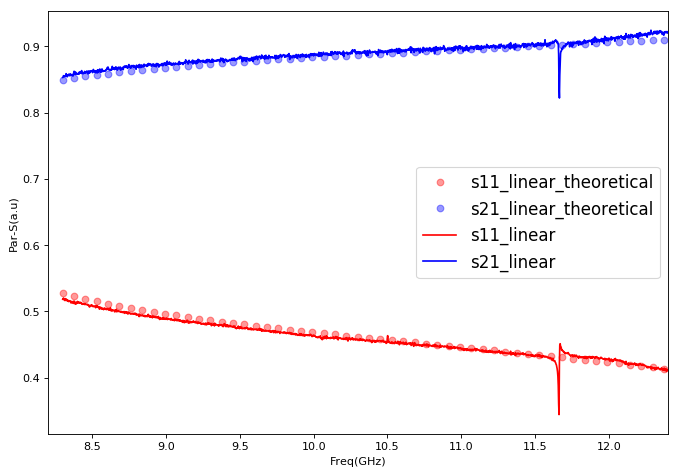

In [8]:
# Test Chart: Analytical vs. Empirical

fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(F_grafic,S11_mod_c,'ro',label ="s11_linear_theoretical",markevery=30,alpha = 0.4)
plt.plot(F_grafic,S21_mod_c,'bo',label="s21_linear_theoretical", markevery=30,alpha = 0.4)
plt.plot(F_grafic,S11_mod,'r-',label ="s11_linear")
plt.plot(F_grafic,S21_mod,'b-',label="s21_linear")

#Limite no eixo - Y
#plt.ylim(0,1)
#plt.ylim(0.4,1)
#Nome eixo - Y
plt.ylabel("Par-S(a.u)")

#Limite no eixo - X
plt.xlim(8.2,12.4)
#Nome eixo - X
plt.xlabel("Freq(GHz)")

plt.legend(fontsize = 15)
plt.show()

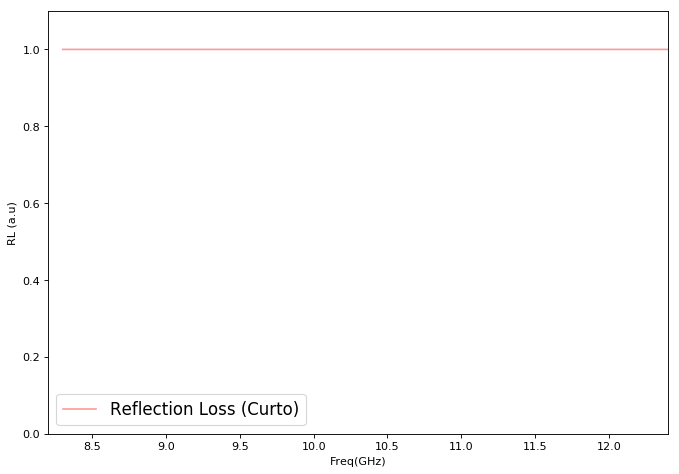

In [9]:
# Reflection Loss for Metal plate backed

fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(F_grafic,R_Zin,'r-',label ="Reflection Loss (Curto)",markevery=10,alpha = 0.4)

#Limite no eixo - Y
plt.ylim(0,1.1)
#plt.ylim(0.4,1)
#Nome eixo - Y
plt.ylabel("RL (a.u)")

#Limite no eixo - X
plt.xlim(8.2,12.4)
#Nome eixo - X
plt.xlabel("Freq(GHz)")

plt.legend(fontsize = 15)
plt.show()

In [10]:
# ------------- Salvar Dados teoricos -------------

#Voltar para pasta raiz
os.chdir(local)

#Pasta: dados_teo
os.chdir('./dados_teo')

#Abrir
arq_teo = open('./'+TXT[n]+'_teorico.txt','w')

#ESCREVER 

#Cabeçalho
escrever = "%8s %8s %8s %8s %8s\n"%("Freq (GHz)","S11_real", "S11_img", "S21_real", "S21_img")
arq_teo.write(escrever)

#Content
for i in range(0,len(F_grafic)):
    
    escrever = "%8.2f %8.4f %8.4f %8.4f %8.4f\n"%(F_grafic[i],s11c[i].real,s11c[i].imag,s21c[i].real,s21c[i].imag)
    arq_teo.write(escrever)
    
    
#Fechar    
arq_teo.close()
